# **Data Cleaning**

## Objectives

* Clean data

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue'

# Load Collected Data

In [30]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/house_prices_ames_iowa.csv"
df = pd.read_csv(df_raw_path)
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125


---

# Data Exploration

We will check the variables with missing data

In [5]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data 

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [6]:
vars_with_missing_data = df.columns[df.isna().sum() > 0]
missing_data_table = pd.DataFrame({
    'Variables': vars_with_missing_data,
    'Number of missing data': df[vars_with_missing_data].isna().sum(),
    'Percentage of missing data': ((df[vars_with_missing_data].isna().sum() * 100) / 1460).round(1),
    'Data type': df[vars_with_missing_data].dtypes
}).sort_values(by='Percentage of missing data', ascending=False)
missing_data_table

,Variables,Number of missing data,Percentage of missing data,Data type
EnclosedPorch,EnclosedPorch,1324,90.7,float64
WoodDeckSF,WoodDeckSF,1305,89.4,float64
LotFrontage,LotFrontage,259,17.7,float64
GarageFinish,GarageFinish,162,11.1,object
BsmtFinType1,BsmtFinType1,114,7.8,object
BedroomAbvGr,BedroomAbvGr,99,6.8,float64
2ndFlrSF,2ndFlrSF,86,5.9,float64
GarageYrBlt,GarageYrBlt,81,5.5,float64
MasVnrArea,MasVnrArea,8,0.5,float64


* Created a table to have a better understanding of the missing values. We can see that `EnclosedPorch` and `WoodDeckSF` have a significant amount of missing data. This means the two variables could not be suitable to bring a meaningful predictive data, so they should be dropped out from the dataset.
* With the 5 variables `LotFrontage`, `BedroomAbvGr`, `2ndFlrSF`, `GarageYrBlt` and `MasVnrArea` that have the data type float64 will be checked to see if the data is normally distributed. If they are, then the missing data will be replaces by mean value, or not by median value. 
* This will be conducted through Shapiro-Wilk test. 

In [7]:
from scipy import stats
from scipy.stats import shapiro

alpha = 0.05
check_normality = ['LotFrontage', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea']

for var in check_normality:
    data = df[var].dropna()
    _, p = stats.shapiro(data)
    if p > alpha:
        print(f"{var}: Data is normally distributed")
    else:
        print(f"{var}: Data is not normally distributed")


LotFrontage: Data is not normally distributed
BedroomAbvGr: Data is not normally distributed
2ndFlrSF: Data is not normally distributed
GarageYrBlt: Data is not normally distributed
MasVnrArea: Data is not normally distributed


---

## Replace missing data with median values

Since all 5 variables are not normally distributed, we will handle the missing data by replacing them with the median values. 

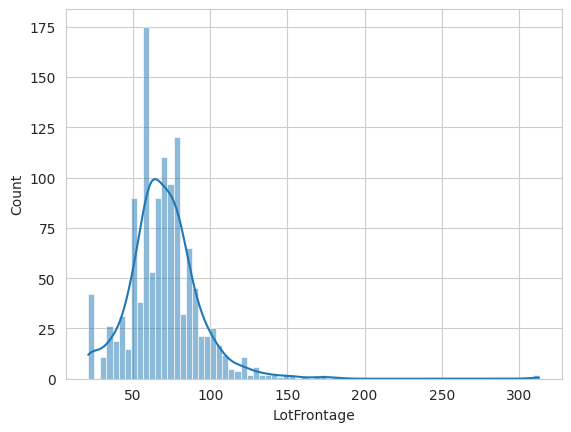

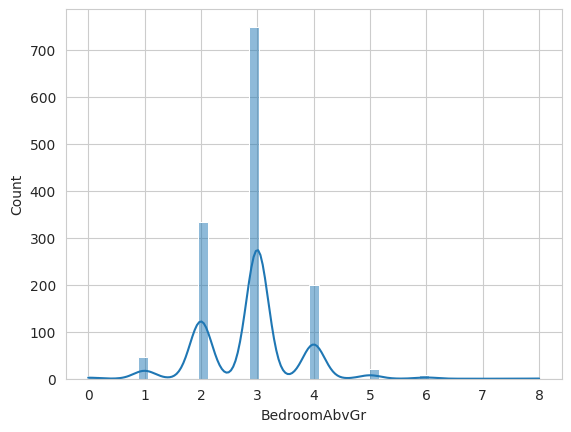

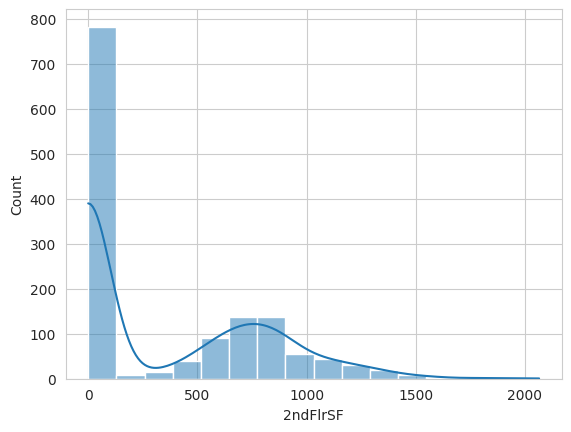

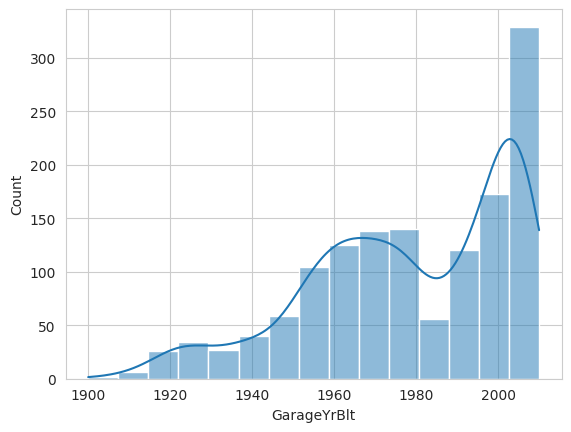

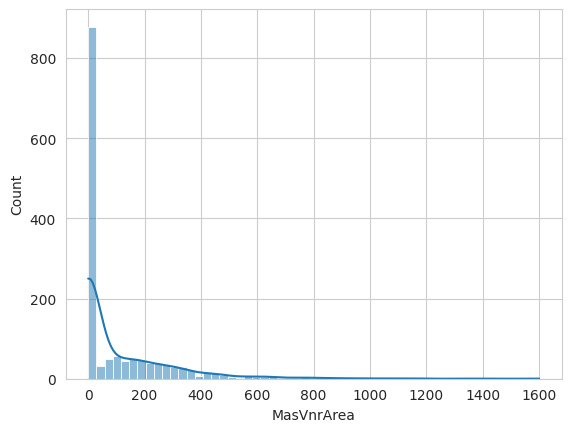

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
for col in check_normality:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()
    print('\n')

In [9]:
from feature_engine.imputation import MeanMedianImputer

imputer = MeanMedianImputer(imputation_method='median',
                            variables=check_normality) # load and set the transformer

In [10]:
imputer.fit(df) # .fit() method makes the transformer learn the median values from the selected variables 

MeanMedianImputer(variables=['LotFrontage', 'BedroomAbvGr', '2ndFlrSF',
                             'GarageYrBlt', 'MasVnrArea'])

In [11]:
imputer.imputer_dict_ # check the learned median values for each variables

{'LotFrontage': 69.0,
 'BedroomAbvGr': 3.0,
 '2ndFlrSF': 0.0,
 'GarageYrBlt': 1980.0,
 'MasVnrArea': 0.0}

In [12]:
df = imputer.transform(df) # transform the data by replacing the missing data with median values for 5 variables
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,3.0,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125


In [13]:
df.isna().sum() # we can now check there are no missing values for 5 variables we worked above. 

1stFlrSF            0
2ndFlrSF            0
BedroomAbvGr        0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1      114
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      162
GarageYrBlt         0
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage         0
MasVnrArea          0
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

---

## Replace missing data with arbitrary value

* Now we are left with 4 variables that contain missing data. As said above, `EnclosedPorch` and `WoodDeckSF` will be dropped out from the dataset. The other 2 variables `BsmtFinType1` and `GarageFinish` have a data type object and it's not numerical, so the missing data from those variables will be replaced by categorical imputers.
* Missing data will be replaced by arbitrary value *'missing'* since the data is a non-numerical variable.

In [14]:
from feature_engine.imputation import CategoricalImputer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('categorical_imputer', CategoricalImputer(imputation_method='missing',
                                                 fill_value='Missing',
                                                 variables=['BsmtFinType1', 'GarageFinish']))
])
pipeline

Pipeline(steps=[('categorical_imputer',
                 CategoricalImputer(variables=['BsmtFinType1',
                                               'GarageFinish']))])

In [15]:
df = pipeline.fit_transform(df)

In [16]:
df['BsmtFinType1'].value_counts()

Unf        396
GLQ        385
ALQ        202
BLQ        136
Rec        126
Missing    114
LwQ         70
None        31
Name: BsmtFinType1, dtype: int64

In [17]:
df['GarageFinish'].value_counts()

Unf        546
RFn        366
Fin        313
Missing    162
None        73
Name: GarageFinish, dtype: int64

In [19]:
df.isna().sum()

1stFlrSF            0
2ndFlrSF            0
BedroomAbvGr        0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1        0
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish        0
GarageYrBlt         0
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage         0
MasVnrArea          0
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

---

## Drop variables

Now we drop the `EnclosedPorch` and `WoodDeckSF`.

In [29]:
from feature_engine.selection import DropFeatures

pipeline = Pipeline([
    ( 'drop_features', DropFeatures(features_to_drop = ['EnclosedPorch',
                                                       'WoodDeckSF']) )
])

df_transformed = pipeline.fit_transform(df)
df_transformed

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
216,1436,0.0,3.0,Mn,946,GLQ,490,484,Missing,2004.0,...,8450,65.0,266.0,98,5,7,1436,2004,2004,210000
228,912,0.0,3.0,No,842,ALQ,70,336,Unf,1974.0,...,8521,70.0,0.0,0,5,5,912,1967,1967,125000
279,1156,866.0,4.0,No,392,BLQ,768,505,Fin,1977.0,...,10005,83.0,299.0,117,5,7,1160,1977,1977,192000
325,803,0.0,2.0,Av,116,BLQ,604,360,Unf,1941.0,...,5000,50.0,0.0,0,6,5,720,1941,1950,87000
339,1215,0.0,3.0,No,585,Rec,630,297,Unf,1958.0,...,12400,66.0,176.0,0,7,6,1215,1958,1998,155000
382,939,858.0,3.0,Av,0,Unf,939,639,Missing,2006.0,...,9245,79.0,0.0,53,5,7,939,2006,2006,213500
403,1165,0.0,4.0,No,0,Unf,1141,420,Fin,1998.0,...,12090,93.0,650.0,123,5,8,1141,1998,1998,258000
466,1277,0.0,2.0,Gd,778,GLQ,499,526,Unf,1970.0,...,10628,85.0,0.0,0,5,7,1277,1970,1970,167000
542,1680,0.0,3.0,No,144,LwQ,379,583,Fin,1998.0,...,10140,78.0,0.0,73,5,7,1650,1998,1999,213250


In [23]:
df.isna().sum()

1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
SalePrice        0
dtype: int64

We can check that there is no missing data on the variables.

---

# Data Cleaning Pipeline

* Let's summarise the cleaning process above.
    * Median imputation: `LotFrontage`, `BedroomAbvGr`, `2ndFlrSF`, `GarageYrBlt`, `MasVnrArea`
    * Categorical imputation: `BsmtFinType1`, `GarageFinish`
    * Dropped: `EnclosedPorch`, `WoodDeckSF`

In [25]:
data_cleaning_pipeline = Pipeline([
    ( 'median', MeanMedianImputer(imputation_method='median',
                                  variables=['LotFrontage', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea']) ),
    ( 'categorical', CategoricalImputer(imputation_method='missing',
                                       fill_value='Missing',
                                       variables=['BsmtFinType1', 'GarageFinish']) ),
    ( 'drop', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']) )
])

## Split the train and test sets

In [35]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet, _, __ = train_test_split(df,
                                            df['SalePrice'],
                                            test_size=0.2,
                                            random_state=0)

print(f"TrainSet Shape: {TrainSet.shape} \n TestSet Shape: {TestSet.shape}")


TrainSet Shape: (1168, 24) 
 TestSet Shape: (292, 24)


In [36]:
TrainSet = data_cleaning_pipeline.fit_transform(TrainSet)
TestSet = data_cleaning_pipeline.fit_transform(TestSet)
df = data_cleaning_pipeline.fit_transform(df)

In [38]:
df_vars_with_missing_data = df.columns[df.isna().sum() > 0]
TrainSet_vars_with_missing_data = TrainSet.columns[TrainSet.isna().sum() > 0]
TestSet_vars_with_missing_data = TestSet.columns[TestSet.isna().sum() > 0]

def print_missing_vars(vars):
    if len(vars) == 0:
        print('None')
    else:
        print(vars)

print("Missing variables in df:")
print_missing_vars(df_vars_with_missing_data)

print("Missing variables in TrainSet:")
print_missing_vars(TrainSet_vars_with_missing_data)

print("Missing variables in TestSet:")
print_missing_vars(TestSet_vars_with_missing_data)

Missing variables in df:
None
Missing variables in TrainSet:
None
Missing variables in TestSet:
None


---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [40]:
import os
try:
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

df.to_csv("outputs/datasets/cleaned/house_prices_ames_iowa_cleaned.csv", index=False)
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

[Errno 17] File exists: 'outputs/datasets/cleaned'
